<a href="https://colab.research.google.com/github/binliu0630/TimeSeries/blob/main/TimeSeries_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import data

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datacamp/datacamp_facebook_live_ny_resolution/master/data/multiTimeline.csv', skiprows =1)
df.head()


,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


## Wrangle Data

In [ ]:
# rename columns
df.columns = ['Month', 'diet', 'gym','finance']

In [ ]:
# turn the 'month' column into a datetime data type and make it in the index of the DataFrame
df['Month'] = pd.to_datetime(df['Month']) # also can use pd.read_csv(, parse_dates = ['Month'])
df.set_index('Month', inplace = True)

In [ ]:
df.head()

,diet,gym,finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## EDA

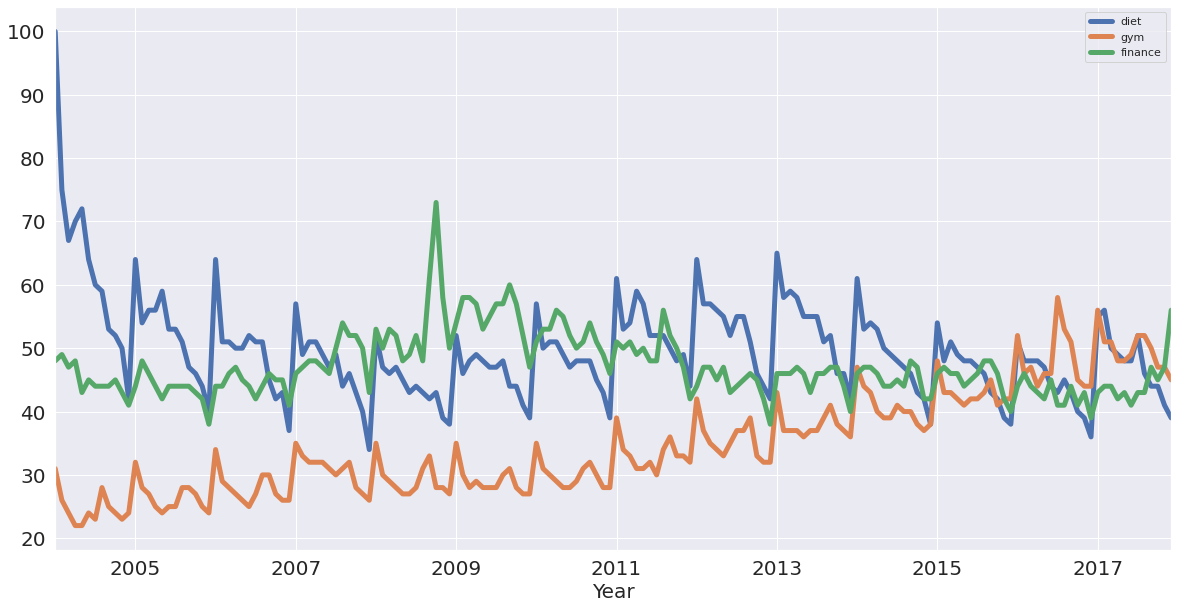

In [ ]:
# Use a built-in `pandas` visualization method to plot your data as 3 line plots on a single figure (one for each column):
df.plot.line(figsize=(20,10), linewidth=5, fontsize = 20);
plt.xlabel('Year', fontsize = 20);

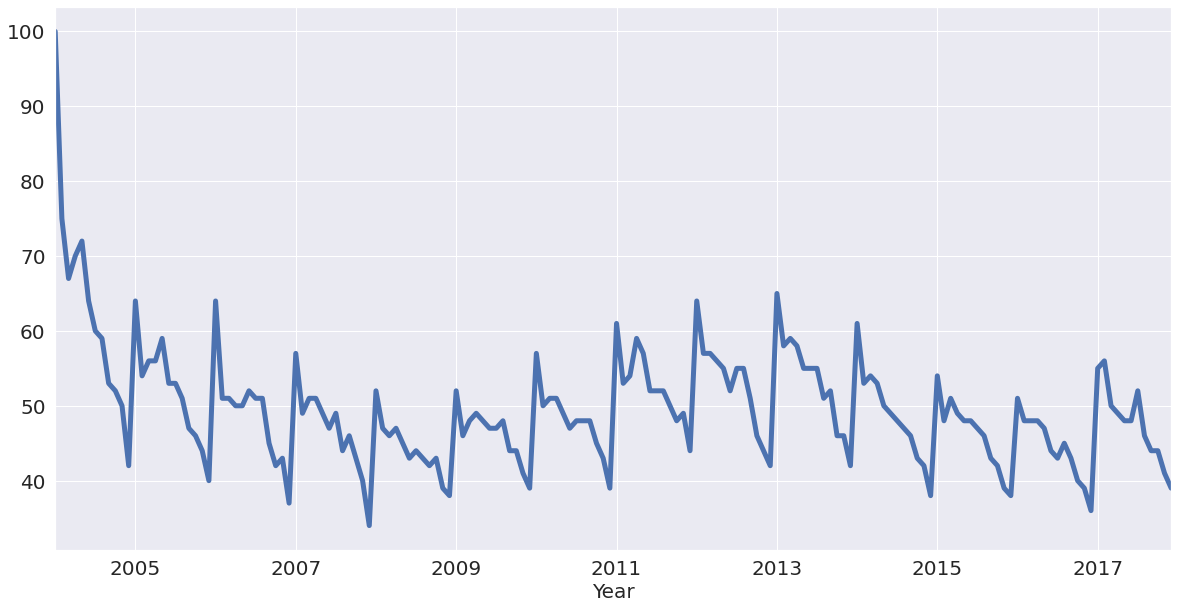

In [ ]:
# Plot the 'diet' column by itself as a time series
df['diet'].plot.line(figsize = (20, 10), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20);

**Note:** it looks like there are trends _and_ seasonal components to these time series.

## Is there a trend?

There are several ways to think about identifying trends in time series. One popular way is by taking a _rolling average_, which means that, for each time point, you take the average of the points on either side of it (the number of points is specified by a _window size_, which you need to choose).

### Check out rolling average:

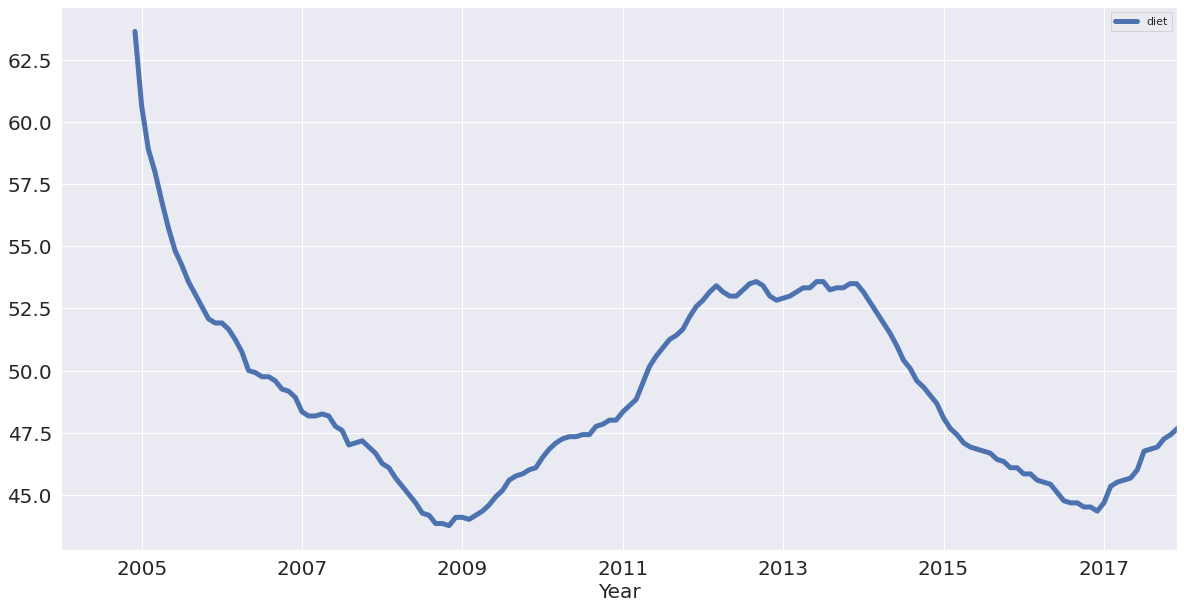

In [ ]:
# Plot the rolling average of 'diet' using built-in `pandas` methods. Choose window size that makes sense!
diet = df[['diet']] # create a data.frame instead of series
diet.rolling(12).mean().plot.line(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20);

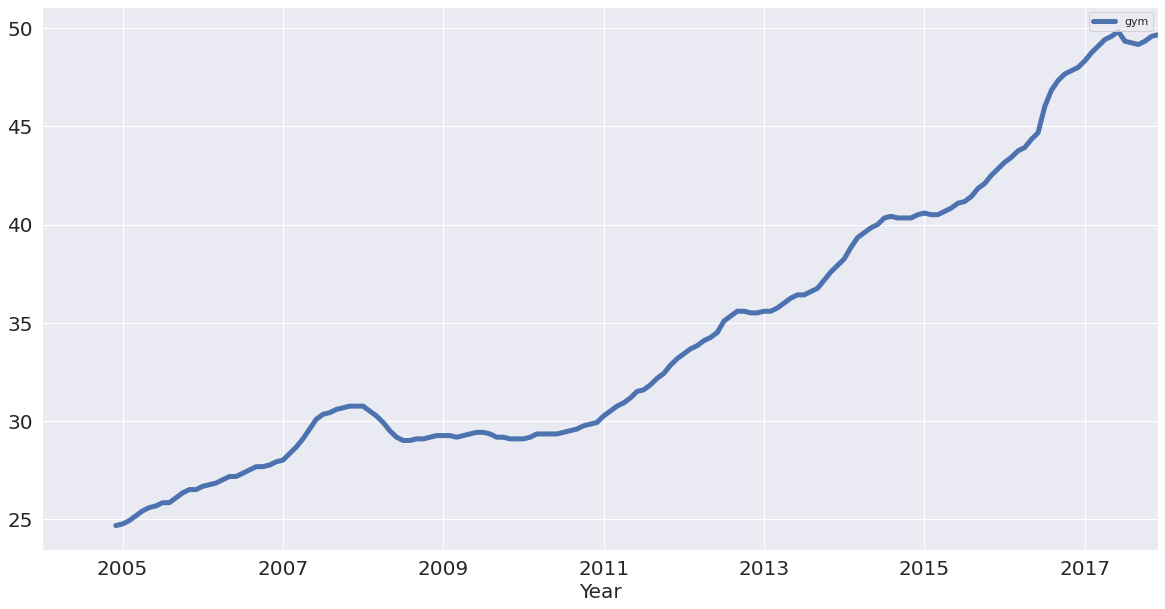

In [ ]:
gym = df[['gym']]
gym.rolling(12).mean().plot.line(figsize = (20, 10), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20);

* 

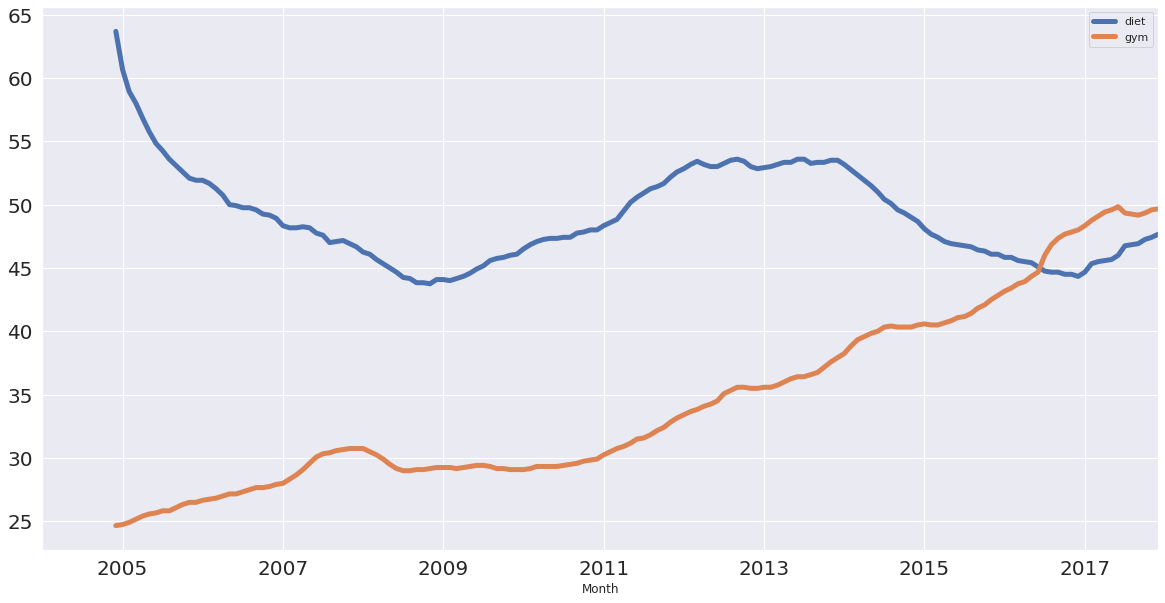

In [ ]:
# Plot the trends of 'gym' and 'diet' on a single figure:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis = 1)
df_rm.plot.line(figsize = (20,10), linewidth = 5, fontsize = 20);

## Seasonal patterns

You can remove the trend from a time series to investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over. Another way to remove the trend is called **differencing**, where you look at the diferrence between successive data points (called first-order differencing).

### First-order differencing

* Use `pandas` to compute and plot the first order difference of the 'diet' series:

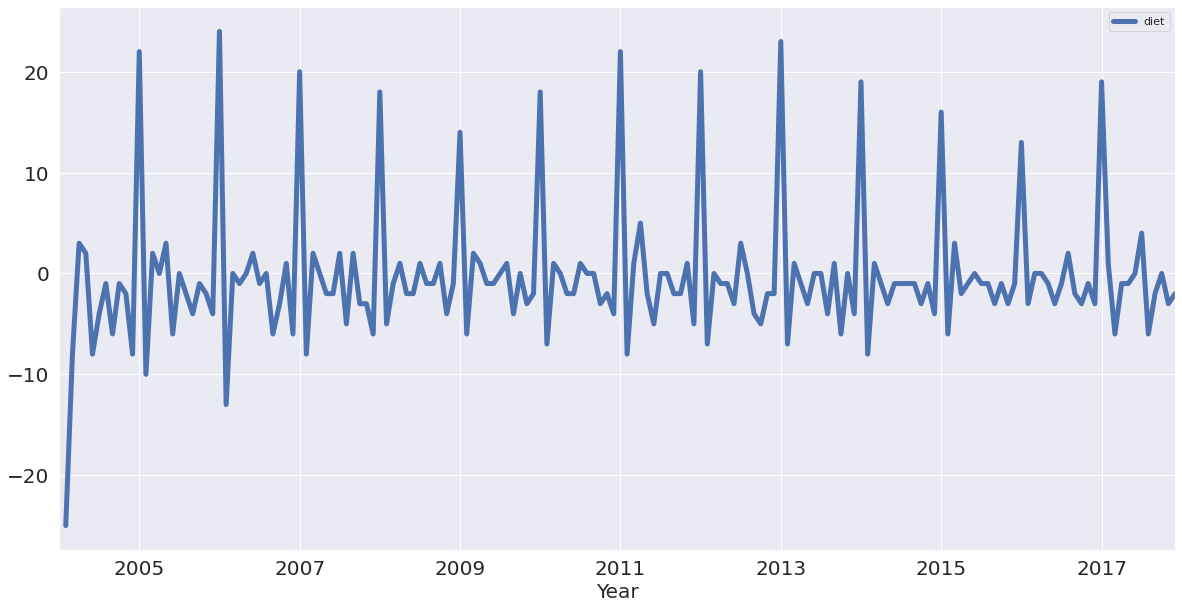

In [ ]:
diet.diff().plot(figsize = (20,10), linewidth = 5, fontsize =20)
plt.xlabel('Year', fontsize=20);


See that you have removed much of the trend and _you can really see the peaks in January every year_. Note: You can also perform 2nd order differencing if the trend is not yet entirely removed. See [here](https://www.otexts.org/fpp/8/1) for more on differencing.

Differencing is super helpful in turning you time series into a **stationary time series**. We won't get too much into these here but a **stationary time series** is one whose statistical properties (such as mean & variance) don't change over time. **Stationary time series** are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

### Periodicity and Autocorrelation

A time series is _periodic_ if it repeats itself at equally spaced intervals, say, every 12 months. Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that. Yet another way of thinking about this is that the time series is _correlated_ with itself shifted by 12 months. 

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of _autocorrelation_. We'll get to this in a minute. First, let's remind ourselves about correlation:

### Correlation

The correlation coefficient of two variables captures how linearly related they are:

* Import the iris dataset from scikit-learn, turn it into a DataFrame and view the head:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


* Use `pandas` or `seaborn` to build a scatter plot of 'sepal length' against 'sepal width', coloured by the target (species):

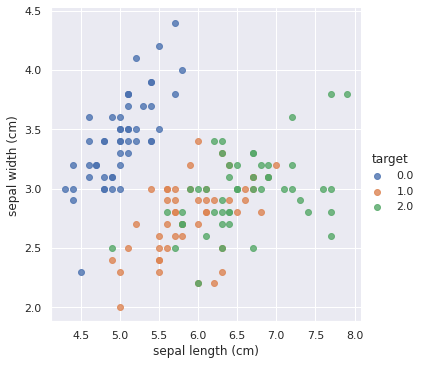

In [ ]:
sns.lmplot(data = df_iris, x='sepal length (cm)', y = 'sepal width (cm)', hue = 'target', fit_reg=False);

**Question:** Are sepal length and width positively or negatively correlated across all flowers? Are they positively or negatively correlated within each species? This is an essential distinction.

* Compute the correlation coefficients of each pair of measurements:

In [ ]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Note that 'sepal length (cm)' and 'sepal width (cm)' seem to be negatively correlated! And they are, over the entire population of flowers measured. But they not within each species. For those interested, this is known as _Simpson's paradox_ and is essential when thinking about causal inference. You can read more [here](http://ftp.cs.ucla.edu/pub/stat_ser/r414.pdf). Let's check out correlation as a function of species:

* Compute the correlation coefficients of each pair of measurements within each species:

In [ ]:
df_iris.groupby('target').corr()

sepal length (cm)  ...  petal width (cm)
target                                       ...                  
0.0    sepal length (cm)           1.000000  ...          0.278098
       sepal width (cm)            0.742547  ...          0.232752
       petal length (cm)           0.267176  ...          0.331630
       petal width (cm)            0.278098  ...          1.000000
1.0    sepal length (cm)           1.000000  ...          0.546461
       sepal width (cm)            0.525911  ...          0.663999
       petal length (cm)           0.754049  ...          0.786668
       petal width (cm)            0.546461  ...          1.000000
2.0    sepal length (cm)           1.000000  ...          0.281108
       sepal width (cm)            0.457228  ...          0.537728
       petal length (cm)           0.864225  ...          0.322108
       petal width (cm)            0.281108  ...          1.000000

[12 rows x 4 columns]

### Correlation of time series

* Plot all your time series again to remind yourself of what they look like:

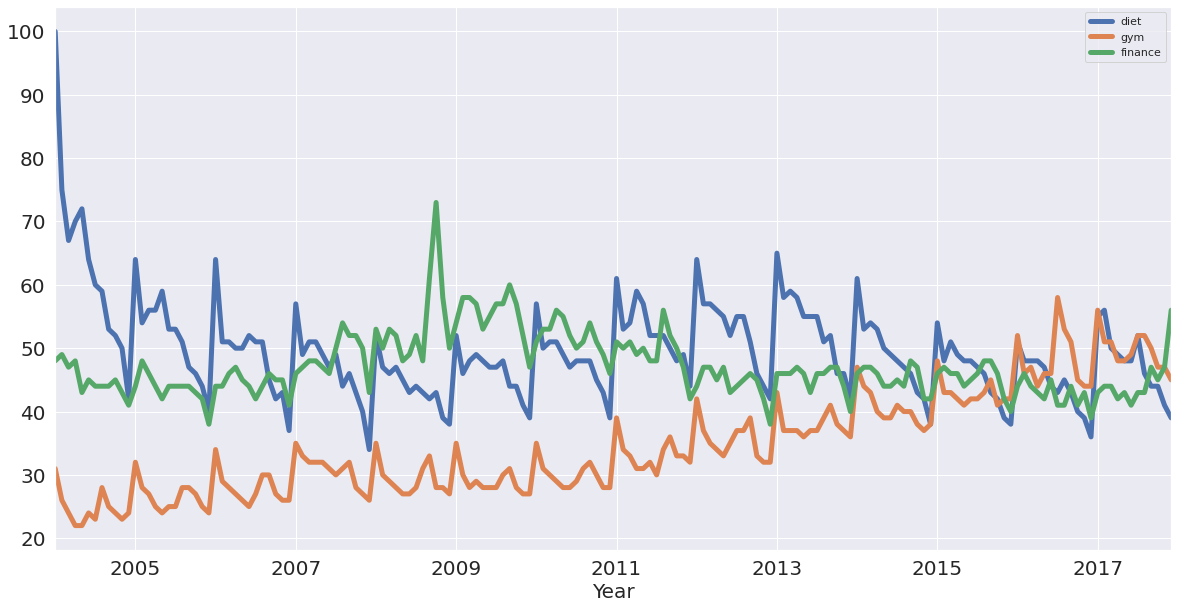

In [ ]:
df.plot.line(figsize = (20, 10), linewidth = 5, fontsize = 20)
plt.xlabel('Year', fontsize = 20);


* Compute the correlation coefficients of all of these time series:

In [ ]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


## Autocorrelation

Now we've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis you have the lag and on the y-axis you have how correlated the time series is with itself at that lag. For example, if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

* Plot the first-order differences of these time series (removing the trend may reveal correlation in seasonality):

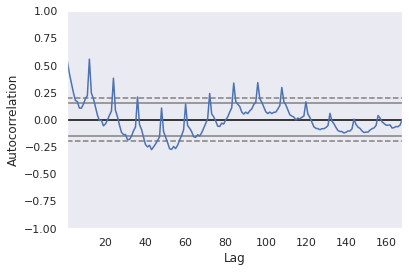

In [ ]:
pd.plotting.autocorrelation_plot(diet);